In [15]:
#!/usr/bin/env python
"""A simple example of plotting the stellar mass function (SMF) from Meraxes
output using single snapshot=100"""

# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge
import random
import sys

fname_in = "imapping_testrun/meraxes.hdf5"
meraxes.set_little_h(0.7)

# Lets import our galaxy catalogue for snapshot = 250
gals, sim_props = meraxes.read_gals(fname_in, snapshot=250, sim_props=True)


In [16]:
# Calculates the number of galaxies in catalogue 'gals'
gal_num = len(gals)
print('gal_num = ', gal_num)

# Returns a sequence of numbers of galaxy IDs ranging from 0 - number of galaxies
gal_ids = range(0,gal_num)
print('gal_ids = ', gal_ids)

# Select a random sample of 50 gal IDs (incides) 
gal_randsam = random.sample(gal_ids, k=50)
print('gal_randsam = ', gal_randsam)

# Make new variable containing the selected properties taken from the random sample of 50 galaxies
selected_gal_properties= gals[gal_randsam]
print('selected_gal_properties = ', selected_gal_properties)


gal_num =  1648367
gal_ids =  range(0, 1648367)
gal_randsam =  [1220024, 856309, 48146, 1322621, 79361, 520517, 1157880, 1185585, 1165324, 655706, 97113, 423795, 278186, 1318055, 314537, 40667, 279486, 456717, 625606, 389895, 946399, 1059203, 423627, 708676, 952306, 944204, 1565848, 1479789, 1550323, 1340334, 533575, 534164, 838043, 230923, 1362884, 1454646, 1295004, 322440, 462782, 1609817, 1448092, 1528442, 1641604, 486950, 84909, 603361, 313952, 1384955, 266813, 1107512]
selected_gal_properties =  [( 727036, 1600000727036, 0, 1220024, 0,   77,   77, [178.41238  , 106.09489  ,  28.931688 ], [-172.42616  ,   38.16856  ,  106.16137  ], 0.03857373,   1.4579511 , 0.04256229,  38.38212 ,  37.7424  , 1.2506081e+00, 5.77460648e-03, 2.09197836e-07, 1.4030290e-02, 1.63964542e-05, 3.63310754e-01, 7.5895106e-04, 1.02680540e-02, 0.0000000e+00, 0.00116092, 1.3477015e-03, 1.6175602e-03, 0., 2.6563287e-03, 8.72307178e-03, 5.7146872e-07, 1.4325200e-07, 0.        , 0.00743791, 1.3971823e+11, 0.      

In [17]:
# Get the galaxy properties from the random sample of galaxy IDs
HIMass_randsam = gals[gal_randsam]["HIMass"]# Hydrogen Mass
Type_randsam = gals[gal_randsam]["Type"]# Galaxy type (Central, Satellite, Orphan)
HaloID_randsam = gals[gal_randsam]["HaloID"]# Halo ID
HaloMass_randsam = gals[gal_randsam]["Mvir"]# Halo Mass
StellarMass_randsam = gals[gal_randsam]["StellarMass"]# Stellar Mass
Sfr_randsam = gals[gal_randsam]["Sfr"]# Star formation rate
position_randsam = gals[gal_randsam]["Pos"]# Position is a list of 2D arrays of position in x,y,z coords and their type (dtype=float32)

print('Type_randsam = ', Type_randsam)

Type_randsam =  [0 0 2 2 2 2 0 0 0 1 2 2 1 0 0 2 2 1 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 2 1 0 0 0 0 0 0 1 0 0 2 0]


In [18]:
# find the minimum and maximum values in each array (apart from Pos, as a list of arrays)

Type_min = min(Type_randsam)
Type_max = max(Type_randsam)

HIMass_min = min(HIMass_randsam)
HIMass_max = max(HIMass_randsam)

HaloID_min = min(HaloID_randsam)
HaloID_max = max(HaloID_randsam)

HaloMass_min = min(HaloMass_randsam)
HaloMass_max = max(HaloMass_randsam)

StellarMass_min = min(StellarMass_randsam)
StellarMass_max = max(StellarMass_randsam)

Sfr_min = min(Sfr_randsam)
Sfr_max = max(Sfr_randsam)

# Calc length of array (should be 50) or num. defined when selected Galaxy IDs
Type_len = len(Type_randsam)

# TEST
print('Type_min =', Type_min)
print('Type_max =', Type_max)
print('Type_rand =', Type_randsam)
print('Type_len =', Type_len)


Type_min = 0
Type_max = 2
Type_rand = [0 0 2 2 2 2 0 0 0 1 2 2 1 0 0 2 2 1 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 2 1 0 0 0 0 0 0 1 0 0 2 0]
Type_len = 50


In [22]:
# Print Samples to a txt file

orig_stdout = sys.stdout
sys.stdout = open("Random_Sample_Galaxies.txt","w+")

print('\n***************************************')
print('All the minimum and maximum information from catalogue variables\n')
print('\n\t\tMinimum value:\t\tMaximum value:')
print('\nType:\t\t', Type_min, '\t\t\t', Type_max)
print('\nHIMass:\t\t', HIMass_min, '\t\t\t', HIMass_max)
print('\nHaloID:\t\t', HaloID_min, '\t\t\t', HaloID_max)
print('\nHaloMass:\t', HaloMass_min, '\t\t', HaloMass_max)
print('\nStellarMass:\t', StellarMass_min, '\t\t\t', StellarMass_max)
print('\nSfr:\t\t', Sfr_min, '\t\t\t', Sfr_max)

# Print the information to see what we are looking at 
#print('\nType variable LENGTH : ', type_len)
print('\n***************************************')
print('\nAll the information from random Samples\n')
print('Type Random Sample : \n', Type_randsam)

#print('\nHIMass variable LENGTH : ', HIMass_len)
print('\nHIMass Random Sample : \n', HIMass_randsam)

#print('\nHaloID variable LENGTH : ', HaloID_len)
print('\nHaloID Random Sample : \n', HaloID_randsam)

#print('\nHaloMass variable LENGTH : ', HaloMass_len)
print('\nHaloMass Random Sample : \n', HaloMass_randsam)

#print('\nStellarMass variable LENGTH : ', StellarMass_len)
print('\nStellarMass Random Sample : \n', StellarMass_randsam)

#print('\nSfr variable LENGTH : ', Sfr_len)
print('\nSfr Random Sample : \n', Sfr_randsam)

#print('\nPos variable LENGTH : ', Pos_len)
#print('\nPos Random Sample : ', Pos_randsam) #uncomment if needed but large sample so clogs output

sys.stdout.close()
sys.stdout=orig_stdout 

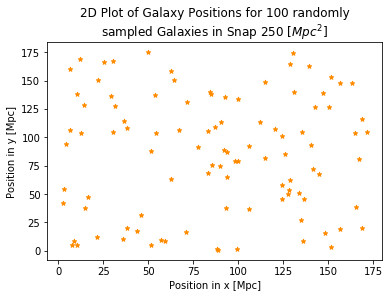

In [4]:
# Lets plot the positions of the galaxy for this snapshot (250)
#print(type(Pos_randsam))
#print('Pos Random Sample 1st list item : ', Pos_randsam[1])
#print('Pos Random Sample 1st list item x : ', Pos_randsam[1][0]) #prints the 0th (x) element of the 1st array item


#Create new empty arrays for x y z components
Pos_x_array = []
Pos_y_array = []
Pos_z_array = []

# for each element in list of positions, extract the xyz components to make up the new arrays
Pos_x_array = Pos_randsam[:,0]


for i in Pos_randsam:
    #print(i)
    Pos_x = i[0]
    Pos_x_array.append(Pos_x)

    Pos_y = i[1]
    Pos_y_array.append(Pos_y)
    
    # uncomment for 3D array
    # Pos_z = i[2]
    # Pos_z_array.append(Pos_z)
    
#print('position x array : ', Pos_x_array)
#print('position y array : ', Pos_y_array)


# x axis values 
x = Pos_x_array
# corresponding y axis values 
y = Pos_y_array
  
# plotting the points
plt.scatter(x, y, color= "darkorange", marker= "*", s=20)   
# plotting the points
plt.scatter(x[type==0], y[type==0], color= "cyan", marker= "*", s=20)  
# naming the x axis 
plt.xlabel('Position in x [Mpc]') 
# naming the y axis 
plt.ylabel('Position in y [Mpc]') 
  
# giving a title to my graph 
plt.title('2D Plot of Galaxy Positions for 100 randomly\nsampled Galaxies in redshift 0') 
  
# function to show the plot 
plt.show() 

In [ ]:
# Now lets try and separately plot the different types of galaxies
# Central (0), Satelitte (1) and Orphan (2)
# using our random sample (as above) make new arrays depending on the galaxy type

# make new arrays for our types
central_type_arr = []
satellite_type_arr = []
orphan_type_arr = []

print('\ntype_arr : ', type_arr)

# centrals = type_arr[type_arr==0]

# central=type_arr[HImass>=0]

for i in type_randsam:
    if i == 0:
        central_type_arr.append(i)
    elif i == 1:
        satellite_type_arr.append(i)
    else:
        orphan_type_arr.append(i)

print('central_type_arr :', central_type_arr)
print('satellite_type_arr : ', satellite_type_arr)
print('orphan_type_arr :', orphan_type_arr)



In [ ]:
'''
# Choose a random sample of galaxies
gals_randsam = random.choices(gals, k=10)
print(gals_randsam)

# Lets calculate the HIMF of these random galaxies
# HImf = "HIMass function"

HImass_arr[type_arr==0]
HImf_randsam = munge.mass_function(gals_randsam["HIMass"], sim_props["Volume"], bins=50,
                         range=(7.5, 11.5))
# Now let's plot the mass function...
# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)
plt.title("Sample of 10 Galaxies for the \nHydrogen Mass Function for \nSnapShot = 250")

# Plot the mass function
ax.plot(HImf_randsam[:, 0], np.log10(HImf_randsam[:, 1]), color="RoyalBlue", lw=2,
        label="Snap = 250")

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_* / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()
plt.savefig("plots/HImf_randsam.pdf")
'''